In [1]:
import os, json, warnings, tkinter as tk
from tkinter import filedialog
from pathlib import Path
import numpy as np, pandas as pd, seaborn as sns, matplotlib, matplotlib.pyplot as plt, matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, MaxNLocator
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
import ipywidgets as widgets
from ipywidgets import interact, interactive, Checkbox, SelectMultiple, VBox, HBox
from IPython.display import display, clear_output

In [2]:
# Read in data. 
current_dir = os.getcwd()
excel_file_path = os.path.join(current_dir, "data", "RC-data-4python-spidersorted_160525_cloudcopy.xlsx")
PRIMA_path = os.path.join(current_dir, "data", "PRIMACALC_results4python.xlsx")

In [16]:
# If this fails with an error → issue with widgets import. It can be glitchy? Restarting kernel may help, if not then close jupyter down compltely, disconnect served and reopen. 
#import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [5]:
df = pd.read_excel(excel_file_path)

#You can read in more than one df from excel, just call it sth else like df2, df3 etc., then use this when filtering for your groups.
df3 = pd.read_excel(PRIMA_path)

# The number of rows displayed is controlled by the Jupyter setting max_rows.
# If you want to change the maximum number of rows displayed, you can use the following command at the beginning of your notebook:
pd.set_option('display.max_rows', 5)

C:\Windows\Anaconda3-2023.09\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [6]:
#Filter the dataframes for your groups. 

CTVZ_Inter_data = df[df['Group'] == 'CTVZ-Inter']
CTVZ_Intra_data = df[df['Group'] == 'CTVZ-Intra']
fo_80_data = df[df['Group'] == 'Fo-80']
fo_85_data = df[df['Group'] == 'Fo-85']
fo_85a_data = df[df['Series'] == 'Fo-85a']
fo_85b_data = df[df['Series'] == 'Fo-85b']
fo_88_data = df[df['Group'] == 'Fo-88']
fo_88a_data = df[df['Series'] == 'Fo-88a']
fo_88b_data = df[df['Series'] == 'Fo-88b']
fo_X_data = df[((df['Group'] == 'Fo-88') | (df['Group'] == 'Fo-85')) & (df['Pb/Ce'] > 0.11)]
fo_glass_data = df[df['Group'] == 'Glass']
LowerCrust_data = df[df['Group'] == 'LowerCrust']
MK_data = df[df['Series'] == 'MK']
Ngauruhoe_data = df[df['Series'] == 'Ngauruhoe']
outliers_data=df[df['Series'] == 'Outlier']
RC_WR_data = df[df['Group'] == 'RC_WR']
RCWRO_data = df[df['Series'] == 'old']
RCWRY_data = df[df['Series'] == 'young']
RCWROAVG_data = df[df['Series'] == 'old_average']
RCWRYAVG_data = df[df['Series'] == 'young_average']
PUK_data = df[df['Series'] == 'PUK']
SIMS_data=df[df['Group'] == 'SIMS']
Tg_GM_data = df[df['Group'] == 'Tg_GM']
Tg_WR_data = df[df['Group'] == 'Tg_WR']
TM_data = df[df['Series'] == 'TM']
TVZB_data=df[df['Group'] == 'TVZB']
Txeno_data=df[df['Group'] == 'Txeno']
Waimarino_data = df[df['Series'] == 'WAI']
withS_data=df[df['Series'] == 'withS']
OHA_data=df[df['Series'] == 'OHA']
Whakaari_data = df[(df['Group'] == 'Whakaari') & (df['Series'] == 'Ol')]
EMORB_data=df[df['Group'] == 'EMORB']
NMORB_data=df[df['Group'] == 'NMORB']
Kakuki_data=df[df['Series2'] == 'Kakuki']
DMMSS_data=df[df['Series'] == 'DMM_SS']
DMMWH_data=df[df['Series'] == 'DMM_WH']
PM89_data=df[df['Series'] == 'PM89']
PM_data=df[df['Group'] == 'PM']
GLOSS2_data = df[df['Group'] == 'GLOSS2']
Sediments_data = df[df['Group'] == 'Sediments']
Waipapa_data = df[df['Series'] == 'Waipapa']
Kaweka_data = df[df['Series'] == 'Kaweka']
Pahau_data = df[df['Series'] == 'Pahau']
Mangamate_data = df[df['Group'] == 'Mangamate']
TH_data=df[df['Series'] == 'TH']
MA_data=df[df['Series'] == 'MA']
WA_data=df[df['Series'] == 'WA']
WH_data=df[df['Series'] == 'WH']
Ruapehu_data=df[df['Group'] == 'Ruapehu']
RuapehuBA_data = df[(df['Group'] == 'Ruapehu') & (df['SiO2_uncorr'].between(40, 57))]
Tg_BA_data = df[(df['Group'] == 'Tg_WR') & (df['SiO2_uncorr'].between(40, 57))]
NgauruhoeBA_data = df[(df['Series'] == 'Ngauruhoe') & (df['SiO2_uncorr'].between(40, 57))]
MangamateBA_data = df[(df['Group'] == 'Mangamate') & (df['SiO2_uncorr'].between(40, 57))]
Kermadec_data = df[df['Group'] == 'Kermadec']

# Newly added
TaranakiAmphXeno_data = df[(df['Group'] == 'Txeno') & (df['Series'] == 'Amph/Px')]
TaranakiGabbroXeno_data = df[(df['Group'] == 'Txeno') & (df['Series'] == 'Gabbro')]
CorellasedimentBD_data = df[(df['Group'] == 'Trench_sediment') & (df['Series'] == 'BD')]
CorellasedimentAD_data = df[(df['Group'] == 'Trench_sediment') & (df['Series'] == 'AD')]
CorellasedimentEC_data = df[(df['Group'] == 'Trench_sediment') & (df['Series'] == 'EC')]
Corellasediment_data = df[df['Group'] == 'Trench_sediment']
XenoMS_data = df[(df['Group'] == 'Xenoliths') & (df['Series'] == 'MS')]
XenoMI_data = df[(df['Group'] == 'Xenoliths') & (df['Series'] == 'MI')]
XenoGabbro_data = df[(df['Group'] == 'Xenoliths') & (df['Series'] == 'Gabbro')]
WaipapaRef_data = df[df['Series3'] == 'Waipapa']
KawekaRef_data = df[df['Series3'] == 'Kaweka']
GambleSediment_data = df[df['Series'] == 'Gamble1996']
XenoMSRef_data = df[(df['Group'] == 'Xenoliths') & (df['Series3'] == 'Refractory MS')]
KtrigPlutonic_data = df[(df['Group'] == 'Ktrig') & (df['Series'] == 'Plutonic')]

WharepuWR_data = df[(df['Group'] == 'Wharepu') & (df['Series'] == 'WR')]
WharepuMI_data = df[(df['Group'] == 'Wharepu') & (df['Series'] == 'OLMI')]
TeMaari1500AD_data = df[(df['Group'] == 'TM1500AD') & (df['Series'] == 'OLMI')]
TeMaari1500ADWR_data = df[(df['Group'] == 'TM1500AD') & (df['Series'] == 'WR')]

In [7]:
#Testing that it worked.
display(fo_X_data)

,Group,Series,Series2,Series3,Sample_ID,Type_Reference,Fo_host,host_Fo,FeO*_calculated,Unnamed: 9,...,Gd_Nb,Tb_Nb,Dy_Nb,Ho_Nb,Y_Nb,Er_Nb,Tm_Nb,Yb_Nb,Lu_Nb,Ca.1
44,Fo-85,Fo-85b,NaN,NaN,RCM-x13-mi,mi,84.467077,0.844671,7.834325,NaN,...,1.218107,0.220576,1.329218,0.295062,7.971193,0.938272,0.140329,0.893004,0.120165,NaN
46,Fo-85,Fo-85b,NaN,NaN,RCM-x26-lg-mi1,mi,84.812701,0.848127,7.884596,NaN,...,1.162500,0.217500,1.275000,0.294583,7.641667,0.912500,0.117500,0.837500,0.129167,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Fo-88,Fo-88a,NaN,NaN,RCX-x16-lg-mi-a,mi,88.330226,0.883302,8.282074,NaN,...,1.584810,0.226835,1.579747,0.321519,9.321519,0.946835,0.164557,0.820253,0.139241,NaN
168,Fo-88,Fo-88a,NaN,NaN,RCX-x16-lg-mi-b,mi,88.330226,0.883302,8.282074,NaN,...,1.462288,0.221139,1.462288,0.342740,9.230375,0.851719,0.135454,0.872242,0.146229,NaN


In [8]:
#Turn your dataframe list into a dictionary of your groups. Can use ChatGPT for this if you have lots of groups. The name 'dataframes' needs to stay the same though.
dataframes = {
    "fo_88": df[df['Group'] == 'Fo-88'],
    "fo_85": df[df['Group'] == 'Fo-85'],
    "fo_glass": df[df['Group'] == 'Glass'],
    "fo_X": df[((df['Group'] == 'Fo-88') | (df['Group'] == 'Fo-85')) & (df['Pb/Ce'] > 0.11)],
    "CTVZ_Inter": df[df['Group'] == 'CTVZ-Inter'],
    "CTVZ_Intra": df[df['Group'] == 'CTVZ-Intra'],
    "RCWRO": df[df['Series'] == 'old'],
    "RCWRY": df[df['Series'] == 'young'],"Ngauruhoe": df[df['Series'] == 'Ngauruhoe'],
    "PUK": df[df['Series'] == 'PUK'], 
    "fo_88a": df[df['Series'] == 'Fo-88a'],
    "fo_88b": df[df['Series'] == 'Fo-88b'],
    "fo_80": df[df['Group'] == 'Fo-80'],
    "fo_85a": df[df['Series'] == 'Fo-85a'],
    "fo_85b": df[df['Series'] == 'Fo-85b'],
    "Kermadec": df[df['Group'] == 'Kermadec'],
    "LowerCrust": df[df['Group'] == 'LowerCrust'],
    "MK": df[df['Series'] == 'MK'],
    "outliers": df[df['Series'] == 'Outlier'],
    "RC_WR": df[df['Group'] == 'RC_WR'],
    "RCWROAVG": df[df['Series'] == 'old_average'],
    "RCWRYAVG": df[df['Series'] == 'young_average'],
    "SIMS": df[df['Group'] == 'SIMS'],
    "Tg_GM": df[df['Group'] == 'Tg_GM'],
    "Tg_WR": df[df['Group'] == 'Tg_WR'],
    "TM": df[df['Series'] == 'TM'],
    "TVZB": df[df['Group'] == 'TVZB'],
    "Txeno": df[df['Group'] == 'Txeno'],
    "OHA": df[df['Series'] == 'OHA'],
    "Waimarino": df[df['Series'] == 'WAI'],
    "withS": df[df['Series'] == 'withS'],
    "Whakaari": df[(df['Group'] == 'Whakaari') & (df['Series'] == 'Ol')],
    "EMORB": df[df['Group'] == 'EMORB'],
    "NMORB": df[df['Group'] == 'NMORB'],
    "Kakuki": df[df['Series2'] == 'Kakuki'],
    "DMMSS": df[df['Series'] == 'DMM_SS'],
    "DMMWH": df[df['Series'] == 'DMM_WH'],
    "PM89": df[df['Series'] == 'PM89'],
    "PM": df[df['Group'] == 'PM'],
    "GLOSS2": df[df['Group'] == 'GLOSS2'],
    "Sediments": df[df['Group'] == 'Sediments'],
    "Waipapa": df[df['Series'] == 'Waipapa'],
    "Kaweka": df[df['Series'] == 'Kaweka'],
    "Pahau": df[df['Series'] == 'Pahau'],
    "Mangamate": df[df['Group'] == 'Mangamate'],
    "TH": df[df['Series'] == 'TH'],
    "MA": df[df['Series'] == 'MA'],
    "WA": df[df['Series'] == 'WA'],
    "WH": df[df['Series'] == 'WH'],
    "Ruapehu": df[df['Group'] == 'Ruapehu'],
    "RuapehuBA": df[(df['Group'] == 'Ruapehu') & (df['SiO2_uncorr'].between(40, 57))],
    "Tg_BA": df[(df['Group'] == 'Tg_WR') & (df['SiO2_uncorr'].between(40, 57))],
    "NgauruhoeBA": df[(df['Series'] == 'Ngauruhoe') & (df['SiO2_uncorr'].between(40, 57))],
    "MangamateBA": df[(df['Group'] == 'Mangamate') & (df['SiO2_uncorr'].between(40, 57))], 
    "TaranakiAmphXeno" : df[(df['Group'] == 'Txeno') & (df['Series'] == 'Amph/Px')],
    "TaranakiGabbroXeno": df[(df['Group'] == 'Txeno') & (df['Series'] == 'Gabbro')],
    "CorellasedimentBD" : df[(df['Group'] == 'Trench_sediment') & (df['Series'] == 'BD')],
    "CorellasedimentAD" : df[(df['Group'] == 'Trench_sediment') & (df['Series'] == 'AD')],
    "CorellasedimentAD" : df[(df['Group'] == 'Trench_sediment') & (df['Series'] == 'EC')],
    "Corellasediment" : df[df['Group'] == 'Trench_sediment'],
    "XenoMS" : df[(df['Group'] == 'Xenoliths') & (df['Series'] == 'MS')],
    "XenoMI" : df[(df['Group'] == 'Xenoliths') & (df['Series'] == 'MI')],
    "XenoGabbro" : df[(df['Group'] == 'Xenoliths') & (df['Series'] == 'Gabbro')], 
    "WaipapaRef" : df[df['Series3'] == 'Waipapa'],
    "KawekaRef" : df[df['Series3'] == 'Kaweka'],
    "GambleSediment" : df[df['Series'] == 'Gamble1996'],
    "XenoMSRef" : df[(df['Group'] == 'Xenoliths') & (df['Series3'] == 'Refractory MS')],
    "KtrigPlutonic" : df[(df['Group'] == 'Ktrig') & (df['Series'] == 'Plutonic')],
    "WharepuWR" : df[(df['Group'] == 'Wharepu') & (df['Series'] == 'WR')],
    "WharepuMI" : df[(df['Group'] == 'Wharepu') & (df['Series'] == 'OLMI')],
    "TeMaari1500AD" : df[(df['Group'] == 'TM1500AD') & (df['Series'] == 'OLMI')],
    "TeMaari1500ADWR": df[(df['Group'] == 'TM1500AD') & (df['Series'] == 'WR')]
}

In [9]:
# Define symbology for groups
#CTVZ_Inter_symbology = {'label': 'CTVZ Inter', 'marker': 'x', 'color': 'palevioletred', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
CTVZ_Inter_EQ_symbology = {'label': 'CTVZ Inter_EQ', 'marker': 'x', 'color': 'yellow', 'edgecolors': 'black', 's': 60, 'linewidth': 1}
#CTVZ_Inter_symbology = {'label': 'CTVZ Inter', 'marker': 'x', 'color': 'lightcoral', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
CTVZ_Inter_symbology = {'label': 'CTVZ Inter', 'marker': 'x', 'color': 'lightcoral', 's': 60, 'linewidth': 0.5}
CTVZ_Intra_EQ_symbology = {'label': 'CTVZ Intra_EQ', 'marker': '+', 'color': 'gold', 'edgecolors': 'black', 's': 60, 'linewidth': 0.8}
#CTVZ_Intra_symbology = {'label': 'CTVZ Intra', 'marker': '+', 'color': 'cornflowerblue', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
CTVZ_Intra_symbology = {'label': 'CTVZ Intra', 'marker': '+', 'color': 'cornflowerblue', 's': 60, 'linewidth': 0.5}
# RC MI data
fo_80_symbology = {'label': 'MI Fo-80', 'color': 'white', 'marker': 's', 'edgecolors': 'orange', 's': 50, 'facecolor': 'none'}
fo_85_symbology = {'label': 'Fo-86 MI', 'marker': 'D', 'edgecolors': 'black', 's': 70, 'color': 'lightgreen', 'linewidth': 0.5, 'zorder':11}
fo_85_uncorr_symbology = {'label': 'Fo-85 MI (uncorr)', 'marker': 'D', 'color': 'orchid', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
fo_88_FELOSS_symbology= {'label': 'MI Fo-88 *FeWR', 'marker': 'o', 'color': 'black', 'edgecolors': 'black', 's': 20, 'linewidth': 0.1}
fo_88_symbology = {'label': 'Fo-88 MI', 'marker': 'o', 'color': 'red', 'edgecolors': 'black', 's': 70, 'linewidth': 0.5, 'zorder':10}
fo_88_uncorr_symbology = {'label': 'Fo-88 MI (uncorr)', 'marker': 'o', 'color': 'orchid', 'edgecolors': 'black', 's': 20, 'linewidth': 0.5}
fo_88b_symbology = {'label': 'Fo-88b', 'marker': 'o', 'color': 'navy', 'edgecolors': 'black', 's': 20, 'linewidth': 0.5}
fo_85b_symbology = {'label': 'Fo-85b', 'marker': 'D', 'color': 'purple', 'edgecolors': 'black', 's': 50, 'linewidth': 0.5}
#fo_X_symbology = {'label': 'Lower crustal fluid contamination?', 'marker': 'D', 'color': 'fuchsia', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5, 'zorder':20}
fo_X_symbology = {'label': '"Enriched" MI', 'marker': '+', 'color': 'black', 's': 70, 'linewidth': 1, 'zorder':20}
fo_glass_symbology = {'label': 'RC glass', 'marker': '^', 'color': 'lightgrey', 'edgecolors': 'black', 's': 70, 'linewidth': 0.5, 'zorder':12}
withS_symbology = {'label': 'MI + sulfide', 'marker': 'o', 'color': 'yellow', 'edgecolors': 'black', 's': 70, 'linewidth': 0.5}
SIMS_symbology = {'label': 'SIMS MI', 'color': 'fuchsia', 'marker': 'o', 'edgecolors': 'black', 's': 50}
fo_88_PRIMA_symbology = {'label': 'MI Fo-88 PRIM', 'marker': 'o', 'color': 'black', 'edgecolors': 'black', 's': 30, 'linewidth': 0.5}
fo_85_PRIMA_symbology= {'label': 'MI Fo-85 PRIM', 'marker': 'o', 'color': 'grey', 'edgecolors': 'black', 's': 30, 'linewidth': 0.5}
fo_glass_PRIMA_symbology= {'label': 'Glass PRIM', 'marker': '^', 'color': 'black', 'edgecolors': 'black', 's': 30, 'linewidth': 0.5}
PRIM_symbology = {'label': 'PRIM', 'marker': 's', 'color': 'black', 'edgecolors': 'black', 's': 40, 'linewidth': 0.5}
outliers_symbology = {'label': 'MI outlier', 'marker': 'o', 'color': 'black', 'edgecolors': 'red', 's': 40, 'linewidth': 0.5}
#Mantle sources etc
PM89_symbology = {'label': 'PM_SM89', 'marker': '*', 'color': 'mediumpurple', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
PM_symbology = {'label': 'PM', 'marker': '*', 'color': 'orchid', 'edgecolors': 'black', 's': 50, 'linewidth': 0.5}
DMMSS_symbology = {'label': 'DMM(SS)', 'marker': '*', 'color': 'hotpink', 'edgecolors': 'black', 's': 150, 'linewidth': 0.5}
DMMWH_symbology = {'label': 'DMM(WH)', 'marker': '*', 'color': 'hotpink', 'edgecolors': 'black', 's': 70, 'linewidth': 0.5}
EMORB_symbology = {'label': 'EMORB', 'marker': '*', 'color': 'teal', 'edgecolors': 'gray', 's': 60, 'linewidth': 0.5}
NMORB_symbology = {'label': 'NMORB', 'marker': '*', 'color': 'crimson', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
#TVZ basalts etc.
TVZB_symbology = {'label': 'TVZ Basalts', 'marker': 's', 'color': 'white', 'edgecolors': 'fuchsia', 's': 50, 'linewidth': 0.5}
Waimarino_symbology = {'label': 'Waimarino WR', 'marker': 'X', 'color': 'fuchsia', 'edgecolors': 'black', 's': 55, 'linewidth': 0.2, 'zorder':21}
Kakuki_symbology = {'label': 'Kakuki WR', 'marker': '+', 'color': 'black', 's': 50, 'linewidth': 3, 'zorder':20}
Whakaari_symbology = {'label': 'Whakaari/White Island', 'marker': 'o', 'color': 'white', 'edgecolors': 'black', 's': 40, 'linewidth': 0.5}

#Tongariro and STVZ WR data
RC_WR_symbology = {'label': 'RCWR', 'marker': 's', 'color': 'white', 'edgecolors': 'fuchsia', 's': 70, 'linewidth': 1}
RCWRO_symbology = {'label': 'RCWR>1.8ka', 'marker': 'o', 'color': 'sienna', 'edgecolors': 'none', 's': 70, 'linewidth': 1}
RCWRY_symbology = {'label': 'RCWR<1.8ka', 'marker': 'o', 'color': 'gold', 'edgecolors': 'lightgray', 's': 70, 'linewidth': 0.5}
RCWROAVG_symbology = {'label': 'RCWR>1.8ka (avg.)', 'marker': 's', 'color': 'sienna', 'edgecolors': 'black', 's': 80, 'linewidth': 0.5}
RCWRYAVG_symbology = {'label': 'RCWR<1.8ka (avg.)', 'marker': 's', 'color': 'gold', 'edgecolors': 'black', 's': 80, 'linewidth': 0.5}
Tg_GM_symbology = {'label': 'Tg GM', 'marker': '>', 'color': 'blue', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
Tg_WR_symbology = {'label': 'Tg WR', 'marker': '<', 'color': 'lightblue', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
PUK_symbology = {'label': 'Pukeonake WR', 'marker': 's', 's': 30, 'color': 'royalblue', 'edgecolors': 'black', 'linewidth': 0.2}
OHA_symbology = {'label': 'Ohakune Craters WR', 'marker': 's', 'color': 'seagreen', 'edgecolors': 'black', 's': 30, 'linewidth': 0.2, 'zorder':5} #seagreen Ōhakune
Ngauruhoe_symbology = {'label': 'Ngāuruhoe WR', 'marker': 's', 'color': 'cyan', 'edgecolors': 'black', 's': 30, 'linewidth': 0.2}
TM_symbology = {'label': 'Upper Te Maari WR', 'marker': 's', 'color': 'violet', 'edgecolors': 'violet', 's': 20, 'linewidth': 0.5}
Mangamate_symbology = {'label': 'Mangamate WR', 'marker': '*', 'color': 'purple', 'edgecolors': 'purple', 's': 40, 'linewidth': 0.5}
MK_symbology = {'label': 'Makahikatoa/Pūkekaikiore', 'marker': 's', 'color': 'fuchsia', 'edgecolors': 'fuchsia', 's': 30, 'linewidth': 0.5}

#Ruapehu
Ruapehu_symbology= {'label': 'Ruapehu', 'marker': 'P', 'color': 'thistle', 'edgecolors': 'black', 's': 40, 'linewidth': 0.5}
TH_symbology= {'label': 'Ruapehu Te Herenga', 'marker': 's', 'color': 'darkorange', 'edgecolors': 'black', 's': 20, 'linewidth': 0.5}
MA_symbology= {'label': 'Ruapehu Mangawhero', 'marker': 'p', 'color': 'pink', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
WA_symbology= {'label': 'Ruapehu Wahianoa', 'marker': 'p', 'color': 'black', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
WH_symbology= {'label': 'Ruapehu Whakapapa', 'marker': 'p', 'color': 'blue', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
#Sediments and subducted sediments
Sediments_symbology = {'label': 'Sediments', 'marker': 'H', 'color': 'olive', 'edgecolors': 'black', 's': 70, 'linewidth': 0.5}
Kaweka_symbology = {'label': 'Kaweka', 'marker': 'H', 'color': 'olive', 'edgecolors': 'red', 's': 100, 'linewidth': 0.5}
Waipapa_symbology = {'label': 'Waipapa', 'marker': 'H', 'color': 'olive', 'edgecolors': 'cyan', 's': 100, 'linewidth': 0.5}
Pahau_symbology = {'label': 'Pahau', 'marker': 'H', 'color': 'olive', 'edgecolors': 'black', 's': 100, 'linewidth': 0.5}
GLOSS2_symbology = {'label': 'GLOSS2', 'marker': '*', 'color': 'olive', 'edgecolors': 'black', 's': 60, 'linewidth': 0.5}
RuapehuBA_symbology = {'label': 'Ruapehu BA', 'marker': 's', 'color': 'darkorange', 'edgecolors': 'darkorange', 's': 20, 'linewidth': 0.5}
Tg_BA_symbology = {'label': 'Tongariro BA', 'marker': 's', 'color': 'black', 'edgecolors': 'gray', 's': 20, 'linewidth': 0.5}
NgauruhoeBA_symbology = {'label': 'Ngāuruhoe BA', 'marker': 's', 'color': 'cyan', 'edgecolors': 'cyan', 's': 20, 'linewidth': 0.5}
MangamateBA_symbology = {'label': 'Mangamate BA', 'marker': 's', 'color': 'fuchsia', 'edgecolors': 'fuchsia', 's': 20, 'linewidth': 0.5}
Kermadec_symbology = {'label': 'Kermadec Arc', 'marker': 'H', 'color': 'white', 'edgecolors': 'fuchsia', 's': 80, 'linewidth': 0.5}

# Newly added
TaranakiAmphXeno_symbology= {'label': 'Taranaki Xeno Amph', 'marker': 'x', 'color': 'green', 'edgecolors': 'fuchsia', 's': 80, 'linewidth': 0.5}
TaranakiGabbroXeno_symbology= {'label': 'Taranaki Xeno Gabbro', 'marker': 'x', 'color': 'green', 'edgecolors': 'green', 's': 80, 'linewidth': 0.5}
CorellasedimentBD_symbology= {'label': 'Corella TrenchSediment BD', 'marker': 'H', 'color': 'gray', 'edgecolors': 'white', 's': 80, 'linewidth': 0.5}
CorellasedimentAD_symbology= {'label': 'Corella TrenchSediment AD', 'marker': 'H', 'color': 'black', 'edgecolors': 'white', 's': 80, 'linewidth': 0.5}
CorellasedimentEC_symbology= {'label': 'Corella TrenchSediment EC', 'marker': 'H', 'color': 'green', 'edgecolors': 'fuchsia', 's': 80, 'linewidth': 0.5}
Corellasediment_symbology= {'label': 'Corella TrenchSediment BD', 'marker': 'H', 'color': 'gray', 'edgecolors': 'fuchsia', 's': 80, 'linewidth': 0.5}
XenoMS_symbology = {'label': 'Xenoliths (metsedimentary)', 'marker': 'x', 'color': 'purple', 's': 80, 'linewidth': 1}
XenoMI_symbology = {'label': 'Xenoliths (metaigneous)', 'marker': 'x', 'color': 'fuchsia', 's': 80, 'linewidth': 1}
XenoGabbro_symbology = {'label': 'Xenoliths (Gabbro)', 'marker': 'x', 'color': 'gray', 's': 80, 'linewidth': 1}
KawekaRef_symbology = {'label': 'Kaweka', 'marker': 'H', 'color': 'aqua', 'edgecolors': 'black', 's': 100, 'linewidth': 0.5}
WaipapaRef_symbology = {'label': 'Waipapa', 'marker': 'H', 'color': 'mediumaquamarine', 'edgecolors': 'black', 's': 100, 'linewidth': 0.5}
GambleSediment_symbology= {'label': 'Gamble96 TrenchSediment', 'marker': 'H', 'color': 'navy', 'edgecolors': 'darkorange', 's': 80, 'linewidth': 1}
XenoMSRef_symbology = {'label': 'Refractory MS xenolith', 'marker': 'x', 'color': 'darkorange', 's': 80, 'linewidth': 2}
KtrigPlutonic_symbology = {'label': 'Ktrig plutonic xeno', 'marker': 'x', 'color': 'orangered', 's': 80, 'linewidth': 2}

#Arpa2025 data
WharepuWR_symbology = {'label': 'Wharepu WR', 'marker': 's', 'color': 'violet', 'edgecolors': 'fuchsia', 's': 25, 'linewidth': 0.5,'zorder':50}
WharepuMI_symbology = {'label': 'Wharepu Ol-MI', 'marker': 'D', 'color': 'violet', 'edgecolors': 'black', 's': 50, 'linewidth': 0.5,'zorder':50}
TeMaari1500AD_symbology = {'label': 'TeMaari 1500AD OL-MI', 'marker': 'D', 'color': 'magenta', 'edgecolors': 'black', 's': 50, 'linewidth': 0.5,'zorder':50}
TeMaari1500ADWR_symbology = {'label': 'Te Maari 1500AD WR', 'marker': 's', 'color': 'darkorange', 'edgecolors': 'black', 's': 30, 'linewidth': 0.2, 'zorder':50}

In [10]:
# Read in error values from spreadsheet if using error bars. First read SD values in and create an error dataframe. Here, the SD values are located in a sheet named 'SD values' within the original Excel file. 
# The sheet is organized with oxides or elements in rows and SD or 2SD in the header. There's another sheet with errors for trace element ratios, pre-calculated.

error_df = pd.read_excel(excel_file_path, sheet_name='SD_values')

# Updated error function to handle ratio 2sd as well.
ratio_error_df = pd.read_excel(excel_file_path, sheet_name='Ratio_2SDs')

def get_error(oxide_name):
    # Try ratio 2SD sheet first
    if oxide_name in ratio_error_df['Oxide_Element'].values:
        return ratio_error_df.loc[ratio_error_df['Oxide_Element'] == oxide_name, '2SD'].values[0]
    
    # Fallback to single element 2SD
    elif oxide_name in error_df['Oxide_Element'].values:
        return error_df.loc[error_df['Oxide_Element'] == oxide_name, '2SD'].values[0]
    
    else:
        return None  # Not found, skip error bars

In [11]:
# Example usage, testing your error function
Oxide_Element = 'SiO2'  # Example oxide name for which you want to retrieve the error value (this is your column header)
error_value = get_error(Oxide_Element)
print(f"Error value for {Oxide_Element}: {error_value}")

Error value for SiO2: 0.3916918626107225


In [12]:
# Define the plotting function that calls on the symbology
def plot_group(ax, x, y, group_name, x_axis_range=None, xerr=None, yerr=None):
    symbology = globals().get(f"{group_name}_symbology", {})  # Look up symbology using the group name
    label = symbology.get('label', group_name)  # Use the label from symbology, fallback to group_name

    scatter_params = dict(symbology, label=label)
    
    ax.scatter(x, y, **scatter_params)

    if x_axis_range is not None:
        ax.set_xlim(x_axis_range)   

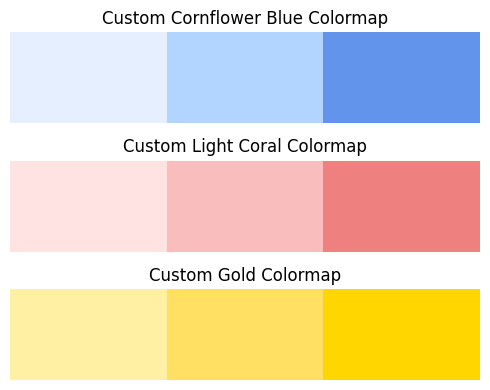

In [13]:
# Create custom colourmap to use specific colours for kde plots using seaborn.

from matplotlib.colors import ListedColormap

# Define the cornflowerblue colormap. 
# The colors are ordered from lightest to darkest. This way, the lightest color will be at the center of the KDE plot (the densest part) and the darker colors will appear further from the center.

colors_cornflowerblue = [
    (0.902, 0.941, 1.0),     # even lighter shade of cornflowerblue
    (0.698, 0.839, 1.0),    # lighter shade of cornflowerblue
    (0.392, 0.584, 0.929)  # cornflowerblue
]
cornflowerblue_cmap = ListedColormap(colors_cornflowerblue, name='custom_cornflowerblue')

# Define the lightcoral colormap
colors_lightcoral = [
    (1.0, 0.894, 0.894),     # even lighter shade of lightcoral  
    (0.980, 0.745, 0.745),  # lighter shade of lightcoral
    (0.941, 0.502, 0.502)  # lightcoral
]
lightcoral_cmap = ListedColormap(colors_lightcoral, name='custom_lightcoral')


colors_gold = [
    (1.0, 0.945, 0.647),  # even lighter shade of gold
    (1.0, 0.882, 0.392),  # lighter shade of gold
    (1.0, 0.843, 0.0)     # original gold (FFD700)
]
gold_cmap = ListedColormap(colors_gold, name='custom_gold')

# Visualize colormaps
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig, axes = plt.subplots(nrows=3, figsize=(5, 4))

# Cornflowerblue colormap
axes[0].imshow(gradient, aspect='auto', cmap=cornflowerblue_cmap)
axes[0].set_title('Custom Cornflower Blue Colormap')
axes[0].set_axis_off()

# Lightcoral colormap
axes[1].imshow(gradient, aspect='auto', cmap=lightcoral_cmap)
axes[1].set_title('Custom Light Coral Colormap')
axes[1].set_axis_off()

axes[2].imshow(gradient, aspect='auto', cmap=gold_cmap)
axes[2].set_title('Custom Gold Colormap')
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

In [14]:
# FIGURE WITH ONE PLOT
# IMPORTANT: CHANGE THE DEFAULT VALUES FOR COLUMNS AND SELECTED GROUPS TO SOMETHING YOU HAVE. I.e. where it says 'value' you need to change the default for something from your data otherwise it'll complain that it can't fint it.

# ---- DROPDOWNS widgets FOR COLUMN SELECTION
x_col_selector = widgets.Dropdown(options=dataframes[list(dataframes.keys())[0]].columns, value='SiO2', description='X-axis:', layout=widgets.Layout(width='160px'))
y_col_selector = widgets.Dropdown(options=dataframes[list(dataframes.keys())[0]].columns, value='CaO', description='Y-axis:', layout=widgets.Layout(width='160px'))

# ---- MULTISELECTS FOR GROUPS
group_selector = widgets.SelectMultiple(options=dataframes.keys(), value=['fo_88','fo_85','CTVZ_Intra'], description='Groups', layout=widgets.Layout(height='900px'))

# ---- CUSTOM AXIS LABELS with default values
x_label_entry = widgets.Text(value='SiO$_2$', description='X Label:', layout=widgets.Layout(width='200px'))
y_label_entry = widgets.Text(value='CaO', description='Y Label:', layout=widgets.Layout(width='200px'))
use_custom_labels = widgets.Checkbox(value=True, description='Use Custom Labels', layout=widgets.Layout(width='300px'))

# ---- FILENAME ENTRY BOX
filename_entry = widgets.Text(value='your_figure_name', description='Filename:', layout=widgets.Layout(width='300px'))

# ---- AXIS LIMIT ENTRY BOXES
xlim_entry_min = widgets.FloatText(value=0, description='X Min:', step=0.1, layout=widgets.Layout(width='150px'))
xlim_entry_max = widgets.FloatText(value=80, description='X Max:', step=0.1, layout=widgets.Layout(width='150px'))
ylim_entry_min = widgets.FloatText(value=0, description='Y Min:', step=0.1, layout=widgets.Layout(width='150px'))
ylim_entry_max = widgets.FloatText(value=20, description='Y Max:', step=0.1, layout=widgets.Layout(width='150px'))


# ---- LEGEND AND KDE TOGGLE CHECKBOXES - adjust KDE as needed, change KDE groups in main function.
legend_toggle = widgets.Checkbox(value=True, description='Legend', layout=widgets.Layout(width='250px'))
kde1_toggle = widgets.Checkbox(value=True, description='KDE1')
kde2_toggle = widgets.Checkbox(value=True, description='KDE2')
kde3_toggle = widgets.Checkbox(value=True, description='KDE3')

# ---- DPI AND FORMAT SELECTION
dpi_slider = widgets.IntSlider(value=300, min=100, max=600, step=50, description='DPI:')
format_selector = widgets.Dropdown(options=['tiff','svg','png'], value='tiff', description='Format:')

last_fig = None

# ---- FIGURE FUNCTION - THIS MAKES YOUR FIGURE
def generate_plot(selected_groups, x_col, y_col, xlim_min, xlim_max, ylim_min, ylim_max,
                  show_legend, x_label_text, y_label_text, use_labels, kde1_on, kde2_on, kde3_on):
    
    fig, ax = plt.subplots(figsize=(8,8))
    legend_elements = {}
    
    # ---- Set axis limits
    ax.set_xlim(xlim_min, xlim_max)
    ax.set_ylim(ylim_min, ylim_max)
    
    for group_name in selected_groups:
        group_data = dataframes[group_name]
        if group_data.empty: 
            continue
        
        group_name_clean = group_name.rsplit("_data",1)[0]
        filtered_data = group_data.dropna(subset=[x_col,y_col])
        filtered_data = filtered_data[(filtered_data[x_col] != 0) & (filtered_data[y_col] != 0)]
        symbology_group = globals().get(f"{group_name_clean}_symbology", {})
        label = symbology_group.get('label', group_name_clean)
        
        if not filtered_data.empty:
            # ---- Plot points
            plot_group(ax, filtered_data[x_col], filtered_data[y_col], group_name_clean)
            if label not in legend_elements:
                legend_elements[label] = ax.scatter([], [], **symbology_group)
            
            # ---- Error bars in top-right. ONLY works if your axes are the same as what's in your error data source, e.g. if you have an SD for that oxide/element.
            x_err_val = get_error(x_col)
            y_err_val = get_error(y_col)
            if x_err_val is not None or y_err_val is not None:
                data_x_pos = xlim_min + 0.95 * (xlim_max - xlim_min)
                data_y_pos = ylim_min + 0.95 * (ylim_max - ylim_min)
                ax.errorbar(data_x_pos, data_y_pos, xerr=x_err_val, yerr=y_err_val, fmt='+', ecolor='black',
                            linewidth=0.5, capsize=0, color='black', markersize=2, clip_on=True)

            # ---- KDE overlays for specified groups
            if group_name == 'CTVZ_Intra' and kde1_on:
                sns.kdeplot(x=group_data[x_col], y=group_data[y_col], ax=ax, fill=True,
                            color='cornflowerblue', alpha=0.5, levels=2, linestyles='--', warn_singular=False)
            if group_name == 'RCWRO' and kde2_on:
                sns.kdeplot(x=group_data[x_col], y=group_data[y_col], ax=ax, fill=True,
                            color='#4F301F', alpha=0.9, levels=2, linestyles='--', warn_singular=False)
            if group_name == 'RCWRY' and kde3_on:
                sns.kdeplot(x=group_data[x_col], y=group_data[y_col], ax=ax, fill=True,
                            cmap=gold_cmap, alpha=1, levels=2, linestyles='--', warn_singular=False)
    
    # ---- Axes labels (conditional on checkbox)
    if use_labels:
        ax.set_xlabel(x_label_text if x_label_text.strip() else x_col, fontsize=12)
        ax.set_ylabel(y_label_text if y_label_text.strip() else y_col, fontsize=12)
    else:
        ax.set_xlabel(x_col, fontsize=12)
        ax.set_ylabel(y_col, fontsize=12)
    
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    
    # ---- Legend
    if show_legend:
        ax.legend(handles=legend_elements.values(), labels=legend_elements.keys(),
                  fontsize=9, ncol=4, loc='upper center', bbox_to_anchor=(0.5, 1.15))
    
    plt.tight_layout()
    plt.show()
    global last_fig
    last_fig = fig
    return fig

# ---- FUNCTION TO SAVE FIGURE
def save_figure(dpi=300, save_format='tiff'):
    global last_fig
    if last_fig is None:
        print("No figure to save!")
        return
    file_name = f"{filename_entry.value}.{save_format}"
    last_fig.savefig(file_name, dpi=dpi, format=save_format, bbox_inches='tight')
    print(f"Figure saved as {file_name} with DPI {dpi}.")

# ---- WIDGET INTERFACE
col_selectors_box = widgets.VBox([x_col_selector, x_label_entry, y_col_selector, y_label_entry, use_custom_labels])
limits_box = widgets.VBox([xlim_entry_min, xlim_entry_max, ylim_entry_min, ylim_entry_max])
axis_box = widgets.HBox([col_selectors_box, limits_box])  # limits to right of selectors

save_button = widgets.Button(description="Save Figure")
save_button.on_click(lambda b: save_figure(dpi=dpi_slider.value, save_format=format_selector.value))

selectors_box = widgets.VBox([
    widgets.HBox([axis_box, legend_toggle]),
    widgets.HBox([kde1_toggle, kde2_toggle, kde3_toggle]),
    dpi_slider,
    format_selector,
    filename_entry,
    save_button
])

# ---- Plot output
output = widgets.interactive_output(
    generate_plot,
    {'selected_groups': group_selector,
     'x_col': x_col_selector,
     'y_col': y_col_selector,
     'xlim_min': xlim_entry_min,
     'xlim_max': xlim_entry_max,
     'ylim_min': ylim_entry_min,
     'ylim_max': ylim_entry_max,
     'show_legend': legend_toggle,
     'x_label_text': x_label_entry,
     'y_label_text': y_label_entry,
     'use_labels': use_custom_labels,
     'kde1_on': kde1_toggle,
     'kde2_on': kde2_toggle,
     'kde3_on': kde3_toggle
    }
)

# ---- Final display layout
display(HBox([group_selector, VBox([selectors_box, output])]))


In [15]:
# 2x subplots using different axes but same data groups for both.
# IMPORTANT: CHANGE THE DEFAULT VALUES FOR COLUMNS AND SELECTED GROUPS TO SOMETHING YOU HAVE

# ---- DROPDOWNS widgets FOR COLUMN SELECTION
x_col_selector_1 = widgets.Dropdown(options=dataframes[list(dataframes.keys())[0]].columns, value='SiO2_uncorr', description='X-axis 1:', layout=widgets.Layout(width='160px'))
y_col_selector_1 = widgets.Dropdown(options=dataframes[list(dataframes.keys())[0]].columns, value='CaO_uncorr', description='Y-axis 1:', layout=widgets.Layout(width='160px'))
x_col_selector_2 = widgets.Dropdown(options=dataframes[list(dataframes.keys())[0]].columns, value='SiO2_uncorr', description='X-axis 2:', layout=widgets.Layout(width='160px'))
y_col_selector_2 = widgets.Dropdown(options=dataframes[list(dataframes.keys())[0]].columns, value='Al2O3_uncorr', description='Y-axis 2:', layout=widgets.Layout(width='160px'))

# ---- MULTISELECTS FOR GROUPS  ----
group_selector = widgets.SelectMultiple(options=dataframes.keys(), value=['fo_88', 'fo_85', 'DMMSS', "CTVZ_Intra"], description='Groups', layout=widgets.Layout(height='900px'))

# ---- AXIS LIMIT ENTRY BOXES ----
xlim_entry_1_min = widgets.FloatText(value=0, description='X Min 1:', step=0.1, layout=widgets.Layout(width='150px'))
xlim_entry_1_max = widgets.FloatText(value=80, description='X Max 1:', step=0.1, layout=widgets.Layout(width='150px'))
ylim_entry_1_min = widgets.FloatText(value=0, description='Y Min 1:', step=0.1, layout=widgets.Layout(width='150px'))
ylim_entry_1_max = widgets.FloatText(value=20, description='Y Max 1:', step=0.1, layout=widgets.Layout(width='150px'))

xlim_entry_2_min = widgets.FloatText(value=0, description='X Min 2:', step=0.1, layout=widgets.Layout(width='150px'))
xlim_entry_2_max = widgets.FloatText(value=80, description='X Max 2:', step=0.1, layout=widgets.Layout(width='150px'))
ylim_entry_2_min = widgets.FloatText(value=0, description='Y Min 2:', step=0.1, layout=widgets.Layout(width='150px'))
ylim_entry_2_max = widgets.FloatText(value=20, description='Y Max 2:', step=0.1, layout=widgets.Layout(width='150px'))

# ---- LEGEND TOGGLE CHECKBOXES ----
legend_toggle_1 = widgets.Checkbox(value=True, description='Legend 1', disabled=False, layout=widgets.Layout(width='250px'))
legend_toggle_2 = widgets.Checkbox(value=True, description='Legend 2', disabled=False, layout=widgets.Layout(width='250px'))

# ---- DPI AND FORMAT SELECTION for saving
dpi_slider = widgets.IntSlider(value=300, min=100, max=600, step=50, description='DPI:')
format_selector = widgets.Dropdown(options=['tiff', 'svg', 'png'], value='tiff', description='Format:')

last_fig = None

# ---- FIGURE FUNCTION ----
def generate_plot_2x(selected_groups, 
                     x_col1, y_col1, xlim1_min, xlim1_max, ylim1_min, ylim1_max,
                     x_col2, y_col2, xlim2_min, xlim2_max, ylim2_min, ylim2_max,
                     show_legend_1, show_legend_2):
    
    # Figure size, how many subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axes = [(axs[0], x_col1, y_col1, [xlim1_min, xlim1_max], [ylim1_min, ylim1_max]),
            (axs[1], x_col2, y_col2, [xlim2_min, xlim2_max], [ylim2_min, ylim2_max])]

    legend_elements = {}

    for ax, x_col, y_col, xlim, ylim in axes:
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
       

        for group_name in selected_groups:
            group_data = dataframes[group_name]
            if not group_data.empty:
                group_name_clean = group_name.rsplit("_data", 1)[0]
                filtered_data = group_data.dropna(subset=[x_col, y_col])
                filtered_data = filtered_data[(filtered_data[x_col] != 0) & (filtered_data[y_col] != 0)]

                if not filtered_data.empty:
                    plot_group(ax, filtered_data[x_col], filtered_data[y_col], group_name_clean)
                    symbology_group = globals().get(f"{group_name_clean}_symbology", {})
                    label = symbology_group.get('label', group_name_clean)
                    if label not in legend_elements:
                        legend_elements[label] = ax.scatter([], [], **symbology_group)

        
        ax.set_xlabel(x_col, fontsize=12)
        ax.set_ylabel(y_col, fontsize=12)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

        #Legends for each plot
        if show_legend_1 if ax == axs[0] else show_legend_2:
            ax.legend(handles=legend_elements.values(), labels=legend_elements.keys(), fontsize=9, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.15))
            
        # Global legend for both plots.
        fig.legend(
            handles=list(legend_elements.values()),
            labels=list(legend_elements.keys()),
            fontsize=10,
            loc='upper center',
            bbox_to_anchor=(0.5, 1.1),
            ncol=5,
            frameon=True
        )
    
    plt.tight_layout()
    plt.show()
    global last_fig
    last_fig = fig
    return fig

# Function for saving the figure - specify here what to save as!
def save_figure(dpi=300, save_format='tiff'):
    global last_fig
    if last_fig is None:
        print("No figure to save!")
        return
    file_name = f"your_figure_name.{save_format}"
    last_fig.savefig(file_name, dpi=dpi, format=save_format, bbox_inches='tight')   # ensures legend and labels are included
    print(f"Figure saved as {file_name} with DPI {dpi}.")

# ---- WIDGET INTERFACE ----
axis_box_1 = widgets.VBox([x_col_selector_1, y_col_selector_1, xlim_entry_1_min, xlim_entry_1_max, ylim_entry_1_min, ylim_entry_1_max])
axis_box_2 = widgets.VBox([x_col_selector_2, y_col_selector_2, xlim_entry_2_min, xlim_entry_2_max, ylim_entry_2_min, ylim_entry_2_max])

save_button = widgets.Button(description="Save Figure")
save_button.on_click(lambda b: save_figure(dpi=dpi_slider.value, save_format=format_selector.value))

# Group the "other controls" above
selectors_box = widgets.VBox([
    widgets.HBox([axis_box_1, axis_box_2, legend_toggle_1, legend_toggle_2,]),
    dpi_slider,
    format_selector,
    save_button
])

# Plot output
output = widgets.interactive_output(
    generate_plot_2x,
    {
         'selected_groups': group_selector, 
        'x_col1': x_col_selector_1,
        'y_col1': y_col_selector_1,
        'xlim1_min': xlim_entry_1_min,
        'xlim1_max': xlim_entry_1_max,
        'ylim1_min': ylim_entry_1_min,
        'ylim1_max': ylim_entry_1_max,
        'x_col2': x_col_selector_2,
        'y_col2': y_col_selector_2,
        'xlim2_min': xlim_entry_2_min,
        'xlim2_max': xlim_entry_2_max,
        'ylim2_min': ylim_entry_2_min,
        'ylim2_max': ylim_entry_2_max,
        'show_legend_1': legend_toggle_1,
        'show_legend_2': legend_toggle_2
    }
)

# Final display layout
display(
    HBox([
        group_selector,        # dataframe selector tall on the left
        VBox([selectors_box, output])  # other selectors stacked above the plot
    ])
)

